## PART 1 - The project's goals

In this project, I will analyze a dataset that contains the most streamed songs on audio streaming platform Spotify, as of 2023.

The main objective of this project is finding out **what makes a song popular.**

I am intending on finding that out by answering the following questions:
- Who were the artists whose songs were streamed the most?
- Do people prefer to listen to old classics, or to new, recent songs?
- Does the month in year affect the number of streams a song gets? Is a certain season better for releasing a song?
- What attributes do the most popular songs have? Are they fast/slow? Happy (major scale) / Sad (minor scale)?
- Do listeners especially like certain musical scales? 
- Do collaborations between artists help in bumping up a song's popularity?

These questions will be answered via data analysis - I will organize, sort and group the data by various fields to find out what attributes affect song popularity, and later visualize my findings to make the data more understandable and accessible.

I will do so using Python and various methods from the Pandas library, and later visualize the data using the matplotlib and seaborn libraries.

## PART 2a + 2b - preparing the data for analysis
#### In this part, I will:
- Load the data onto a python pandas DataFrame
- Describe how the dataset is built and what the columns and values in it mean
- Look for outliers, errors and null values, and treat them accordingly
- Remove columns unnecesarry for the data analysis, and insert new columns that will help analyze the data
- Check if certain columns need to be converted to different datatypes, and if they do - convert them to the correct datatype

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
songs = pd.read_csv("spotify-most-streamed-2023-project3.csv")

In [3]:
songs.head(5) # Viewing the first five rows from the table:

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [4]:
songs.info() # Viewing some information about the table:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

-------------------------------------------------------------------------------------

## The dataset

Looking at a few rows of the table and the "info" table, we can now see how the dataset is built and what we can learn from it.

The dataset contains the most streamed songs on Spotify as of 2023; each row in the dataset represents one song within the list.

The dataset contains 953 rows, which should represent the 953 most popular songs.

The dataset contains the following values:

- **"track_name"** - name of the song.
- **"artist(s)_name "** - name of the artist who released the song.
- **artist_count** - how many artists were collaborating on the song.
- **released_year**, **released_month**, **released_day** - the year, month and day in which the song was released.
- **in_spotify_playlists** - number of Spotify playlists the song is included in.
- **in_spotify_charts** - tells us if the song is on the Spotify charts, and if it is, where it is ranked. *Not useful for our data analysis and will be removed.*
- **streams** - total number of streams the song has received on Spotify so far.
- **columns on indexes 9-13 (Apple, Deezer, Shazam)** - data about how many playlists the song has gotten into and where it is ranked on different music apps. *Not useful for our data analysis and will be removed.*
- **bpm** - the song's tempo, measured in beats per minute (abbreviated BPM).
- **key** - the song's musical key.
- **mode** - the song's musical mode (major or minor).
- **columns on indexes 17-23** - contain estimates about the song's attributes - how suitable it is for dancing, how happy it is, how energetic it is, etc.
- **cover_url** - a URL address leading to the song's cover art, or the song's album's cover art. *Not useful for our data analysis and will be removed.*

### Some disclaimers and important notes before we start analyzing the data.

1. This table only contains the most popular songs on Spotify. Therefore, each and every song on the list should serve as an example for a popular song that we could learn from.

    This means there are two ways to analyze and group attributes to find what makes songs popular: by simply **counting** all of the rows in the table, and by accounting for the songs' relative popularity by using the "streams" column and taking its **sum**.

   Both methods will be used in this data analysis.

2. Throughout the analysis, the dataset will be also referred to as "leaderboards", "top tracks", "charts", etc. All are terms that represent a list of the most successful songs.

3. There are a lot of long explanations throughout the analysis, so I opted for writing most of my analysis and my longer comments in markdown cells (rather than comments), for it to be more readable.


Now we can start analyzing the data.

------------------------------------------------------------------------------------------------------

In [5]:
# "streams" represents the number of times a song has been streamed - it shouldn't be of type "object", but "int" - we'll fix that

In [6]:
songs["streams"] = pd.to_numeric(songs["streams"], errors = 'coerce') # We are coercing errors so that if there's something that isn't a number, we can get rid of it

In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

In [8]:
# One of the values in "streams" couldn't be converted to a number. Let's check what it was:
songs[songs["streams"].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,A,Major,53,75,69,7,0,17,3,https://i.scdn.co/image/ab67616d0000b2739a0011...


In [9]:
# We can now remove it:
songs.drop(songs[songs["streams"].isna()].index, inplace = True)

In [10]:
# Now we can turn the streams column to an int:
songs["streams"] = songs["streams"].astype(int)

In [11]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


In [12]:
# We can see there are many nulls in the "key" column as well - let's view them:
songs[songs["key"].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,NaN,Major,71,65,68,6,0,3,7,https://i.scdn.co/image/ab67616d0000b27358039b...
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,NaN,Major,44,14,9,96,0,10,3,Not Found
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,NaN,Minor,48,44,42,12,2,11,3,https://i.scdn.co/image/ab67616d0000b2734ae1c4...
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,NaN,Major,81,63,68,11,0,11,4,Not Found
44,Barbie World (with Aqua) [From Barbie The Album],"Nicki Minaj, Aqua, Ice Spice",3,2023,6,23,1117,80,65156199,82,...,NaN,Major,77,75,58,52,0,23,25,https://i.scdn.co/image/ab67616d0000b2737e8f93...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Hold Me Closer,"Elton John, Britney Spears",2,2017,11,10,4967,0,284216603,165,...,NaN,Major,67,49,77,11,0,19,11,https://i.scdn.co/image/ab67616d0000b2735d872e...
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,...,NaN,Major,68,80,92,10,0,9,12,https://i.scdn.co/image/ab67616d0000b27387f53d...
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,...,NaN,Major,74,71,89,24,61,15,5,Not Found
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,NaN,Major,48,15,31,80,22,12,4,https://i.scdn.co/image/ab67616d0000b273bb54dd...


In [13]:
# And we'll check what keys exist within the "key" column:
songs["key"].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [14]:
len(songs["key"].unique())

12

In [15]:
# There are 12 existing keys in music, and here there are only 11 known keys and one null.

# The missing key here is C, a very popular key which is sometimes even considered the "default" key for songs in the major mode.

# Therefore, it should be safe to assume that the blank values in the "key" column represent the C key.

In [16]:
# We'll swap the null values for C:
songs["key"] = songs["key"].fillna(value = "C")

In [17]:
# Just to make sure all keys are now valid, real keys:
songs["key"].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', 'C', 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [18]:
# And making sure there are no nulls left in the "key" column:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   952 non-null    object


In [19]:
# Now we'll drop some columns that are not relevant to us for the data analysis - we can overwrite the original table since we won't need those columns:
songs = songs.drop(labels =
                                   ["in_spotify_charts","in_apple_playlists", "in_apple_charts", "in_deezer_playlists",
                                    "in_deezer_charts", "in_shazam_charts", "cover_url"],
                                   axis = 1)

In [20]:
# Let's view the table now:
songs.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,303236322,144,A,Minor,65,23,80,14,63,11,6


In [21]:
songs.info() # We can see that there are no nulls anymore in the entire table

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   streams               952 non-null    int64 
 8   bpm                   952 non-null    int64 
 9   key                   952 non-null    object
 10  mode                  952 non-null    object
 11  danceability_%        952 non-null    int64 
 12  valence_%             952 non-null    int64 
 13  energy_%              952 non-null    int64 
 14  acousticness_%        952 non-null    int64 
 15  instrumentalness_%    952 non-null    int64 


In [22]:
# Creating a new column - release date (from the release year, month and day):
songs.insert(6, "release_date",
                    pd.to_datetime(dict(
    year=songs["released_year"], month=songs["released_month"], day=songs["released_day"]), errors = 'coerce'))

In [23]:
# Making sure that it worked and that the column has been added:
songs

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,release_date,in_spotify_playlists,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,2023-07-14,553,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,2023-03-23,1474,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,2023-06-30,1397,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,2019-08-23,7858,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,2023-05-18,3133,303236322,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,2022-11-03,953,91473363,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,2022-10-21,1180,121871870,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,2022-11-03,573,73513683,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,2022-10-20,1320,133895612,97,C#,Major,82,67,77,8,0,12,5


In [24]:
# Now we can remove year, month and day so that the table is easier to read - we can use the full date to group by day/month/year later anyway:
songs.pop("released_year")
songs.pop("released_month")
songs.pop("released_day")

0      14
1      23
2      30
3      23
4      18
       ..
948     3
949    21
950     3
951    20
952     4
Name: released_day, Length: 952, dtype: int64

In [25]:
# Checking that the columns are indeed gone and that there are no new nulls in release_date:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   release_date          952 non-null    datetime64[ns]
 4   in_spotify_playlists  952 non-null    int64         
 5   streams               952 non-null    int64         
 6   bpm                   952 non-null    int64         
 7   key                   952 non-null    object        
 8   mode                  952 non-null    object        
 9   danceability_%        952 non-null    int64         
 10  valence_%             952 non-null    int64         
 11  energy_%              952 non-null    int64         
 12  acousticness_%        952 non-null    int64         
 13  instrumentalness_%    952

In [26]:
# A track name (song name) should be pretty much unique, there shouldn't be many repetitions.
# Let's check if they are all really unique:
songs.nunique()

track_name              942
artist(s)_name          644
artist_count              8
release_date            476
in_spotify_playlists    878
streams                 948
bpm                     124
key                      12
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [27]:
# NO - there are 952 rows and 942 different track names.
# Let's check if there are complete duplicates (and if there are - drop them) and try again.

In [28]:
songs.drop_duplicates(inplace=True)

In [29]:
songs.info() # Changed nothing - there were no complete duplicates - let's dig deeper

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   release_date          952 non-null    datetime64[ns]
 4   in_spotify_playlists  952 non-null    int64         
 5   streams               952 non-null    int64         
 6   bpm                   952 non-null    int64         
 7   key                   952 non-null    object        
 8   mode                  952 non-null    object        
 9   danceability_%        952 non-null    int64         
 10  valence_%             952 non-null    int64         
 11  energy_%              952 non-null    int64         
 12  acousticness_%        952 non-null    int64         
 13  instrumentalness_%    952

We can assume that songs with the same title by different artists are different tracks.

We will, however, assume that songs with the same title, same artist, same release date, and the same key and BPM are the **same version of the same song.**

For this purpose, we'll treat songs with the same title and same artist but different release dates/keys/BPM as **DIFFERENT songs** (such as a slow version, a remaster, a remix, etc.).


In [30]:
# First, let's see how many tracks are not unique:
print(f'Songs with just the same name (could have different artists): {len(songs[songs.duplicated(["track_name"], keep='first')])}')
print(f'Songs with the same name and the same artist (could have different release date/key/BPM): {len(songs[songs.duplicated(["track_name", "artist(s)_name"], keep='first')])}')
print(f'Songs with the same name, artist and release date (could have different key/BPM): {len(songs[songs.duplicated(["track_name", "artist(s)_name", "release_date"], keep='first')])}')
print(f'Songs with the same name, artist, release date, key and BPM: {len(songs[songs.duplicated(["track_name", "artist(s)_name", "release_date", "key", "bpm"], keep='first')])}')

Songs with just the same name (could have different artists): 10
Songs with the same name and the same artist (could have different release date/key/BPM): 4
Songs with the same name, artist and release date (could have different key/BPM): 3
Songs with the same name, artist, release date, key and BPM: 1


In [31]:
# Now we know why not all track names are unique.
# As I said, it's better that we treat songs that have different vital attributes (such as artist, key, BPM or release date) as different songs.
# Let's view the one song that has them all as the same:
songs[songs.duplicated(["track_name", "artist(s)_name", "release_date", "key", "bpm"], keep=False)] # keep is set to False so that we can see how many duplicate rows there are in total

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022-03-19,3202,726307468,170,C,Major,56,53,64,11,0,45,6
873,SNAP,Rosa Linn,1,2022-03-19,1818,711366595,170,C,Major,56,52,64,11,0,45,7


In [32]:
# Everything is the same, except for the playlist count, streams, and "valence" and "speechiness" values (only vary by 1).
# I think it's fair to treat this one as a duplicate, and remove the record with less streams and playlists (since it's probably outdated).
# The song is named "SNAP" and we want to remove the entry with an "in_spotify_playlists" value of 1818, which is the lower of the two.
# First, let's make sure this is the only entry with those attributes:

mask_snap = songs["track_name"]=="SNAP"
mask_1818 = songs["in_spotify_playlists"]==1818
len(songs[mask_snap&mask_1818])

1

In [33]:
# It's just that row, so let's drop it:
songs.drop(songs[mask_snap&mask_1818].index, inplace = True) # We are getting the index of the row that fulfills the mask conditions we've set, and dropping it.

In [34]:
# Let's check that the row's really gone:
songs[songs.duplicated(["track_name", "artist(s)_name", "release_date", "key", "bpm"], keep=False)]

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%


In [35]:
# Checking there's just one song named "SNAP":
songs[songs["track_name"]=="SNAP"]

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022-03-19,3202,726307468,170,C,Major,56,53,64,11,0,45,6


In [36]:
## The duplicate is indeed gone.

In [37]:
# Making sure there is one fewer row in the dataset (should be 951 now):
songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            951 non-null    object        
 1   artist(s)_name        951 non-null    object        
 2   artist_count          951 non-null    int64         
 3   release_date          951 non-null    datetime64[ns]
 4   in_spotify_playlists  951 non-null    int64         
 5   streams               951 non-null    int64         
 6   bpm                   951 non-null    int64         
 7   key                   951 non-null    object        
 8   mode                  951 non-null    object        
 9   danceability_%        951 non-null    int64         
 10  valence_%             951 non-null    int64         
 11  energy_%              951 non-null    int64         
 12  acousticness_%        951 non-null    int64         
 13  instrumentalness_%    951

In [38]:
# In music, the combination of mode (minor/major) and key is called scale.
# I want to create a new column to tell us what scale each song is written in.
# This will let us know later on what musical scale is the most popular.
# "mode" is in index 8, so we'll insert the new column right after it, at index 9.

songs.insert(9, "scale", songs["key"] + " " + songs["mode"])

In [39]:
# Last thing before starting to analyze the data -
# Are there any outliers we need to take care of?
# We'll check the numeric fields using "describe":

songs.describe()

,artist_count,release_date,in_spotify_playlists,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,951.000000,951,951.000000,9.510000e+02,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,1.557308,2018-09-27 13:31:36.529968384,5206.124080,5.139300e+08,122.503680,66.995794,51.405889,64.274448,27.095689,1.584648,18.186120,10.141956
min,1.000000,1930-01-01 00:00:00,31.000000,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020-07-07 12:00:00,874.000000,1.415514e+08,99.500000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022-04-08 00:00:00,2224.000000,2.902286e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022-11-04 00:00:00,5605.500000,6.732287e+08,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.500000,11.000000
max,8.000000,2023-07-14 00:00:00,52898.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000
std,0.893619,NaN,7904.794743,5.671191e+08,28.042106,14.634637,23.492873,16.567227,26.010044,8.418334,13.698024,9.920093


In [40]:
# artist_count has a very low standard deviation, but that makes sense - getting a large number of artists to collaborate is uncommon and difficult.
# bpm standard deviation makes sense.
# OUTLIERS:
# --> Streams - the minimum value is just 2,762, while most of the values are in the tens or hundreds of millions (and the largest - even in billions).
# --> in_spotify_playlists - huge standard deviation, we have to check the distribution.
# --> instrumentalness - maybe we should check the 10 highest values, the max is 91 but everything up to at least 75% is zero.

In [41]:
# Let's check the streams first:

songs.nsmallest(10, "streams")

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,scale,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022-12-09,763,2762,162,A#,Major,A# Major,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022-12-22,138,1365184,105,G,Major,G Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023-07-13,437,11599388,97,C,Major,C Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023-06-01,293,11956641,133,B,Minor,B Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023-07-14,410,14780425,140,C#,Major,C# Major,56,48,73,0,0,35,4
58,S91,Karol G,1,2023-07-14,525,16011326,128,C,Minor,C Minor,86,42,72,59,0,9,19
30,Rush,Troye Sivan,1,2023-07-13,864,22581161,126,F,Minor,F Minor,74,35,84,0,0,11,6
248,Danger (Spider) (Offset & JID),"Offset, JID",2,2023-06-02,214,24975653,143,B,Major,B Major,83,25,69,4,0,23,12
104,New Jeans,NewJeans,1,2023-07-07,77,29562220,134,E,Minor,E Minor,81,53,72,51,0,12,5
193,Better Than Revenge (Taylor's Version),Taylor Swift,1,2023-07-07,86,30343206,146,B,Minor,B Minor,50,67,89,0,0,19,8


In [42]:
# We can see there are two outliers - one with 2,762 streams, and one with just over a million.
# All the other songs have over ten million streams.
# This table is supposed to represent the most streamed songs on Spotify as of 2023, so the fact that two songs with so little streams got here doesn't make sense.
# Therefore, we'll drop them.
mask_low_streams = songs["streams"]<10000000

songs.drop(songs[mask_low_streams].index, inplace = True)

In [43]:
# We should now see 949 songs instead of 951, and a minimum value in the tens of millions (instead of thousands) - let's see:
songs.describe()

,artist_count,release_date,in_spotify_playlists,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,949.000000,949,949.000000,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,1.552160,2018-09-24 07:38:15.047418368,5216.146470,5.150117e+08,122.480506,66.998946,51.366702,64.264489,27.122234,1.587987,18.178082,10.151739
min,1.000000,1930-01-01 00:00:00,31.000000,1.159939e+07,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020-06-28 00:00:00,880.000000,1.420953e+08,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022-04-08 00:00:00,2226.000000,2.908332e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022-11-04 00:00:00,5669.000000,6.738011e+08,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.000000,11.000000
max,8.000000,2023-07-14 00:00:00,52898.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000
std,0.882715,NaN,7910.093987,5.672263e+08,28.036574,14.630289,23.499223,16.581680,26.030204,8.426895,13.702032,9.928019


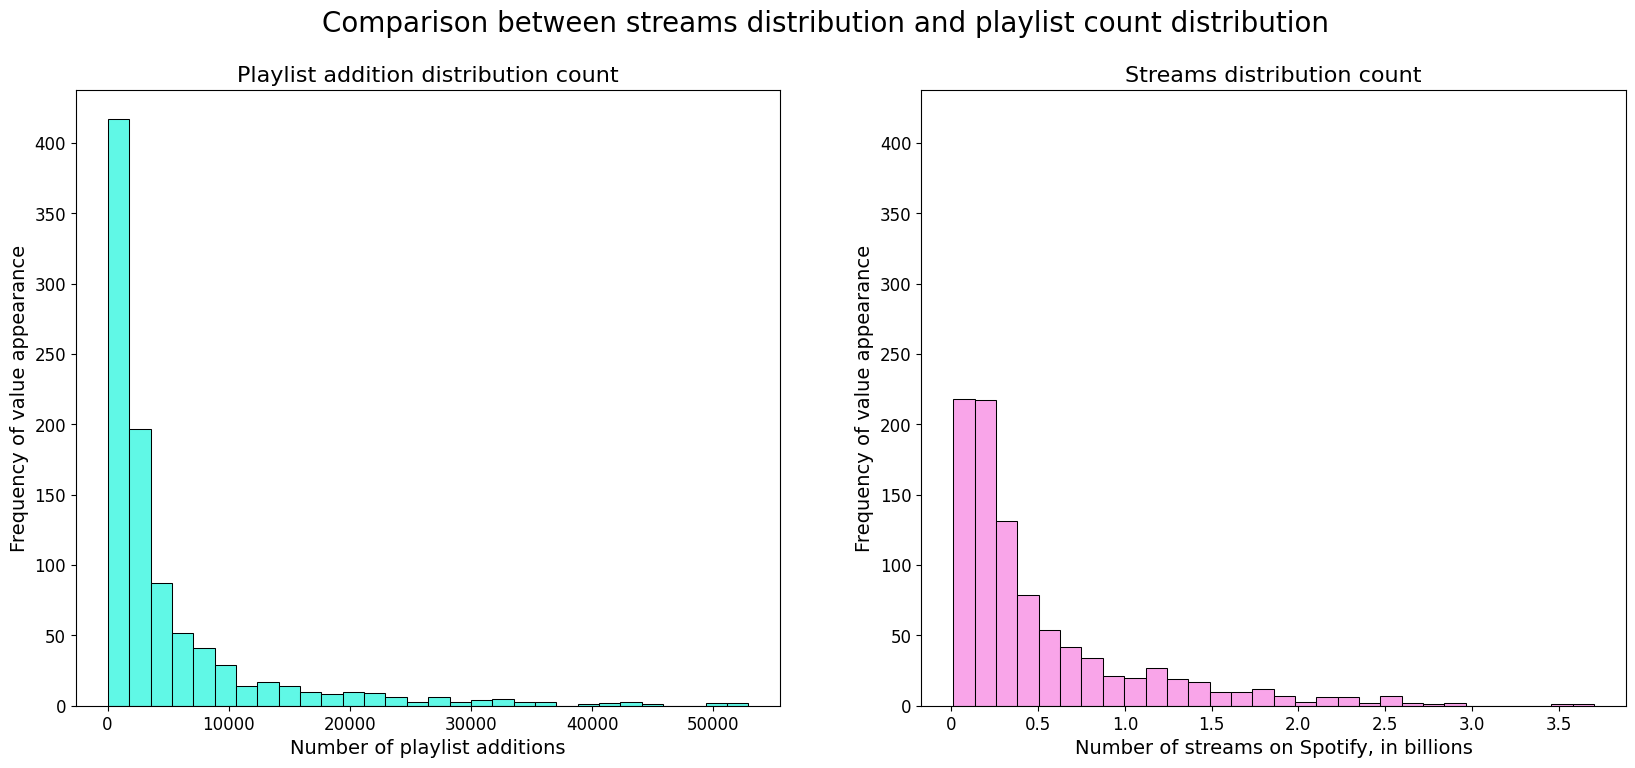

In [44]:
# Next, we'll check if the huge spread of values in "in_spotify_playlists" makes sense, and if it's evenly spread.
# It's actually much easier to see that using a graph - we'll compare the data to the data in the "streams" column, since it's going to be key to our data analysis:
plt.figure(figsize = (20,8))
plt.suptitle("Comparison between streams distribution and playlist count distribution", fontsize = 20)
first_subplot = plt.subplot(1,2,1) # This is so the y-axis can be shared, and we can properly compare the graphs to each other.
plt.hist(songs["in_spotify_playlists"], edgecolor = "#000000", linewidth = 0.75, bins = 30, color = "#60F8E6")
plt.title("Playlist addition distribution count", fontsize = 16)
plt.xlabel("Number of playlist additions", fontsize = 14)
plt.ylabel("Frequency of value appearance", fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.subplot(1,2,2, sharey = first_subplot)
plt.hist(songs["streams"], edgecolor = "#000000", linewidth = 0.75, bins = 30, color = "#F9A5E9")
plt.title("Streams distribution count", fontsize = 16)
plt.xlabel("Number of streams on Spotify, in billions", fontsize = 14)
plt.ylabel("Frequency of value appearance", fontsize = 14)
plt.xticks([0, 0.5e9, 1e9, 1.5e9, 2e9, 2.5e9, 3e9, 3.5e9], labels = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

First of all, we can see that the two have relatively similar distribution trends (with a peak at the smaller numbers and a constant decline towards the higher numbers), so they could be correlated - which is reasonable; it makes sense for there to be many songs that do moderately well, and a few worldwide "hit" songs that really stand out.

Some points worth noting:
- The distribution in the "streams" column is more spread out, and the decline from the lower end to the higher end isn't as sharp.
- Streams are generally considered a better indicator for song popularity.

Both columns are indicators for song popularity, but these are two reasons for the "streams" column being better for analysis; therefore, we'll check if the two columns are correlated, and if they are - we'll use the "streams" column for our data analysis, while keeping an eye out to see if the playlists addition column correlates to other columns.

In [45]:
# Are "streams" and "in_spotify_playlists" correlated?
# If they are, we'll get a number that is relatively close to 1.

songs["streams"].corr(songs["in_spotify_playlists"])

np.float64(0.7899425937209167)

This means they are pretty closely correlated - which again, makes sense, since the more exposure and streams a song has, the more likely people are to add it to their playlists.

As I said, we'll analyze the data based on the "streams" column from now on.

In [46]:
# Now for the "instrumentalness" problem - a lot of the values are 0, but the maximum is 91.
# Let's check how many non-zero values there are:
len(songs[songs["instrumentalness_%"]!=0])

87

In [47]:
# So there are actually quite a few values there - not a lot, but a few.
# We'll keep the column to see later if the values there correlate to song popularity (streams).

In [48]:
songs.describe()

,artist_count,release_date,in_spotify_playlists,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,949.000000,949,949.000000,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,1.552160,2018-09-24 07:38:15.047418368,5216.146470,5.150117e+08,122.480506,66.998946,51.366702,64.264489,27.122234,1.587987,18.178082,10.151739
min,1.000000,1930-01-01 00:00:00,31.000000,1.159939e+07,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020-06-28 00:00:00,880.000000,1.420953e+08,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022-04-08 00:00:00,2226.000000,2.908332e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022-11-04 00:00:00,5669.000000,6.738011e+08,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.000000,11.000000
max,8.000000,2023-07-14 00:00:00,52898.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000
std,0.882715,NaN,7910.093987,5.672263e+08,28.036574,14.630289,23.499223,16.581680,26.030204,8.426895,13.702032,9.928019


In [49]:
# Now let's look at statistics about the object fields in the dataframe:
songs.describe(include = "object")

,track_name,artist(s)_name,key,mode,scale
count,949,949,949,949,949
unique,940,642,12,2,24
top,About Damn Time,Taylor Swift,C#,Major,C Major
freq,2,34,120,546,74


#### What we can learn from this:
- 642 different artists got into 2023's top charts.
- The artist that got the most songs into the top charts is Taylor Swift.
- More major-scale songs got into the top charts than minor-scale songs.

#### Before we begin the proper data analysis, there are two things we need, or want, to do:
1. Sort the table by the number of streams, to make it look like a top tracks chart.
2. Reset the row indexes to be continuous again, since we've dropped some rows. To make the dataset look like a top tracks table, the new indexes will start at 1 (so that the most streamed song is #1).

In [50]:
# 1. Sorting the table:
# We want to sort the table in DESCENDING order, because we want the most-streamed song to be on top.

songs.sort_values("streams", ascending = False, inplace = True)

In [51]:
# Looking at the few first rows to see that it has been sorted by the stream count, regardless of index:
songs.head(5)

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,scale,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019-11-29,43899,3703895074,171,C#,Major,C# Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017-01-06,32181,3562543890,96,C#,Minor,C# Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018-11-08,17836,2887241814,110,C#,Major,C# Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019-05-10,24529,2864791672,98,F#,Minor,F# Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018-10-09,24094,2808096550,90,D,Major,D Major,76,91,50,54,0,7,5


In [52]:
# 2. Resetting the indexes
# We want to start the index at 1, descending by one number at a time, but we need to know what to end it with.
# That's just the table's length (row count) - len(songs).
# The range function doesn't include the number we input for the "stop" argument in the actual range, so we have to add one to the stop condition for it to work properly:
new_index = pd.Index(range(1,len(songs)+1,1))

In [53]:
songs.set_index(new_index, inplace = True)

In [54]:
# Making sure the new index has been inserted and that the table really begins with 1 and ends with 949:

In [55]:
songs.head(5)

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,scale,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
1,Blinding Lights,The Weeknd,1,2019-11-29,43899,3703895074,171,C#,Major,C# Major,50,38,80,0,0,9,7
2,Shape of You,Ed Sheeran,1,2017-01-06,32181,3562543890,96,C#,Minor,C# Minor,83,93,65,58,0,9,8
3,Someone You Loved,Lewis Capaldi,1,2018-11-08,17836,2887241814,110,C#,Major,C# Major,50,45,41,75,0,11,3
4,Dance Monkey,Tones and I,1,2019-05-10,24529,2864791672,98,F#,Minor,F# Minor,82,54,59,69,0,18,10
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018-10-09,24094,2808096550,90,D,Major,D Major,76,91,50,54,0,7,5


This also tells us that the most streamed song on Spotify is "Blinding Lights" by The Weeknd, followed by "Shape of You" by Ed Sheeran.

In [56]:
songs.tail(5)

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,scale,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
945,Rush,Troye Sivan,1,2023-07-13,864,22581161,126,F,Minor,F Minor,74,35,84,0,0,11,6
946,S91,Karol G,1,2023-07-14,525,16011326,128,C,Minor,C Minor,86,42,72,59,0,9,19
947,Overdrive,Post Malone,1,2023-07-14,410,14780425,140,C#,Major,C# Major,56,48,73,0,0,35,4
948,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023-06-01,293,11956641,133,B,Minor,B Minor,93,68,65,42,0,12,25
949,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023-07-13,437,11599388,97,C,Major,C Major,79,92,89,5,0,6,5


Indeed works.

Another insight we can get from this table is that four of the five least streamed songs were released in the middle of July 2023 - which might suggest they are very new and that the data was extracted not long after.

Let's check at what date the newest song on the list was released to check that claim:

In [57]:
songs["release_date"].max()

Timestamp('2023-07-14 00:00:00')

Indeed, the newest song on the dataset was released on 14/07/2023 - so the songs at the bottom of the list are very new and haven't had as much time to amass a large amount of streams as the other songs.

#### We're all set to begin the data analysis.

## PART 2c + 2d - Data analysis

While looking for outliers, we have already performed an initial data analysis, like finding minimum and maximum values, taking the average of a column, etc.
However, to answer the questions we've asked in the beginning of the project, more has to be done.

#### In this part, I will:

Group the data by different categories to find out what makes a song likeable:
 - Check what artists have generated the most streams as of 2023.
 - Check what musical scales were the most popular within 2023's most popular songs.
 - Check if listeners tend to prefer songs by sole artists or collaborations between multiple known artists.
 - Check if listeners tend to prefer old or new songs (by year), and what months were the best to release songs within the most popular years.
 - Check how different columns correlate to the "streams" column to find out what attributes make a song popular.

In [58]:
# We have already viewed the "describe" table for our dataset.
# Let's view it again:

songs.describe()

,artist_count,release_date,in_spotify_playlists,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,949.000000,949,949.000000,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,1.552160,2018-09-24 07:38:15.047418368,5216.146470,5.150117e+08,122.480506,66.998946,51.366702,64.264489,27.122234,1.587987,18.178082,10.151739
min,1.000000,1930-01-01 00:00:00,31.000000,1.159939e+07,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020-06-28 00:00:00,880.000000,1.420953e+08,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022-04-08 00:00:00,2226.000000,2.908332e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022-11-04 00:00:00,5669.000000,6.738011e+08,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.000000,11.000000
max,8.000000,2023-07-14 00:00:00,52898.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000
std,0.882715,NaN,7910.093987,5.672263e+08,28.036574,14.630289,23.499223,16.581680,26.030204,8.426895,13.702032,9.928019


In [59]:
# As I said, the dataset we're analyzing represents the most popular songs on Spotify as of 2023.
# Therefore, looking at the averages of the columns should already give us some kind of "formula" for a popular song.

From the "mean" column, we can see that the average song on the top-songs chart has the following attributes:
- Between 1 and 2 artists (median is 1)
- A tempo of about 122 BPM - moderately fast (the median is also close - 121 BPM)
- The dominant attributes being "danceability" and "energy", with "instrumentalness" and "speechiness" taking relatively low values

Therefore, we can expect that listeners prefer a low number of artists collaborating (if at all), a moderately fast tempo, and songs that are pretty energetic and suitable for dancing while having little instrumental content and not many spoken words.

In general, it's interesting to check if there are any fields that directly correlate to the "streams" column, and that their increase or decrease causes an increase in streams.

We'll check if these hypotheses and questions hold true after we analyze the data properly.

In [60]:
songs.describe(include = 'object')

,track_name,artist(s)_name,key,mode,scale
count,949,949,949,949,949
unique,940,642,12,2,24
top,Numb,Taylor Swift,C#,Major,C Major
freq,2,34,120,546,74


We can also see, as we mentioned before, that the artist that has gotten the most songs into the top-songs chart is Taylor Swift, and that it seems that listeners prefer major-mode songs over minor-mode songs, since there are more major-mode songs in the dataset.

The most popular key is C#, and the most popular scale is C Major.

#### What were the 10 most-streamed songs?

We've already arranged the table by stream count - we'll show the top 10 rows:

In [61]:
songs.head(10)

,track_name,artist(s)_name,artist_count,release_date,in_spotify_playlists,streams,bpm,key,mode,scale,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
1,Blinding Lights,The Weeknd,1,2019-11-29,43899,3703895074,171,C#,Major,C# Major,50,38,80,0,0,9,7
2,Shape of You,Ed Sheeran,1,2017-01-06,32181,3562543890,96,C#,Minor,C# Minor,83,93,65,58,0,9,8
3,Someone You Loved,Lewis Capaldi,1,2018-11-08,17836,2887241814,110,C#,Major,C# Major,50,45,41,75,0,11,3
4,Dance Monkey,Tones and I,1,2019-05-10,24529,2864791672,98,F#,Minor,F# Minor,82,54,59,69,0,18,10
5,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018-10-09,24094,2808096550,90,D,Major,D Major,76,91,50,54,0,7,5
6,One Dance,"Drake, WizKid, Kyla",3,2016-04-04,43257,2713922350,104,C#,Major,C# Major,77,36,63,1,0,36,5
7,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021-07-09,17050,2665343922,170,C#,Major,C# Major,59,48,76,4,0,10,5
8,Believer,Imagine Dragons,1,2017-01-31,18986,2594040133,125,A#,Minor,A# Minor,77,74,78,4,0,23,11
9,Closer,"The Chainsmokers, Halsey",2,2016-05-31,28032,2591224264,95,G#,Major,G# Major,75,64,52,41,0,11,3
10,Starboy,"The Weeknd, Daft Punk",2,2016-09-21,29536,2565529693,186,G,Major,G Major,68,49,59,16,0,13,28


We've already mentioned that the most popular key in the table is C#;

We can see here that no less than FIVE of the top 10 songs are in C#, including all of the top 3.

Therefore, it may be wise for composers and producers looking to produce successful songs to write their songs in the C# key.

#### Who were the artists with the most streams on Spotify?

We'll add up the number of streams and group that by the different artist names, and show the top 10 artists in descending order.

In [62]:
songs.groupby("artist(s)_name")[["streams"]].sum().nlargest(10, "streams")

,streams
artist(s)_name,
The Weeknd,14185552870
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
Olivia Rodrigo,7442148916
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731


We can see that the artist with the most streams is The Weeknd (who, as we saw earlier, also had the most-streamed track on the platform), closely followed by Taylor Swift (despite not having even a single song on the top 10) and Ed Sheeran.

#### Who got the most songs into the leaderboards?

We'll count the different artists' names, and show the 10 most frequent names in descending order.

In [63]:
songs["artist(s)_name"].value_counts().to_frame().head(10)

,count
artist(s)_name,
Taylor Swift,34
The Weeknd,22
Bad Bunny,19
SZA,19
Harry Styles,17
Kendrick Lamar,12
Morgan Wallen,11
Ed Sheeran,9
Feid,8


Taylor Swift leads this time, with The Weeknd and Bad Bunny (5th most streamed overall) also showing massive success in both total streams and number of appearances in the top songs chart.

SZA, who isn't in the top-10 most streamed artists, shares 3rd place with Bad Bunny;

Ed Sheeran, the the 3rd most streamed artist, takes 8th place here with 9 different songs - his success in the most-streamed chart is probably thanks to Shape of You (the 2nd most streamed song).

#### What musical scales were the most popular?

We've already seen that the C# key dominates the top-10 as well as the entire table, but we also want to know the most popular scales.

In similar ways to how we've done with the artists - we'll check what scales have generated the most streams and what scales were the most frequent to appear.

We'll use the mask we've created to ignore songs where the key isn't known:

In [64]:
songs.groupby("scale")[["streams"]].sum().nlargest(10, "streams")

,streams
scale,
C# Major,45886945477
D Major,37753187664
C Major,36784804191
G# Major,34385678157
G Major,32535398138
B Minor,26795507667
C# Minor,26626684366
F# Minor,25606160037
F Major,23228966310


In [65]:
songs.groupby("scale")[["streams"]].count().nlargest(10, "streams")

,streams
scale,
C Major,74
C# Major,73
D Major,66
G Major,65
G# Major,63
C# Minor,47
B Minor,46
E Minor,45
F Minor,45


In [66]:
songs.groupby("scale")[["streams"]].sum().nsmallest(5, "streams")

,streams
scale,
D Minor,5138382631
D# Major,8183547602
G# Minor,9013301482
D# Minor,10066658223
G Minor,10912779171


In [67]:
songs.groupby("scale")[["streams"]].count().nsmallest(5, "streams")

,streams
scale,
D# Major,12
D Minor,15
E Major,17
C Minor,20
D# Minor,21


C Major, C# Major and D Major seem to be the most successful scales, both in number of streams generated and number of songs in the leaderboards (with C# major with the most streams and C Major with the most appearances).

The D# key (both major and minor scales) seems like a key artists should avoid if they want their songs to be popular, as well as the D Minor scale which appears at the bottom of both the streams table and appearances table.

#### What musical mode has generated more streams?

We already know that there are more major songs than minor songs on the leaderboards, but do minor songs make up for it in terms of total streams generated?

In [68]:
songs.groupby("mode")[["streams"]].sum().sort_values(by="streams", ascending = False)

,streams
mode,
Major,292910469000
Minor,195835625001


In [69]:
songs.groupby("mode")[["streams"]].mean().sort_values(by="streams", ascending = False)

,streams
mode,
Major,5.364661e+08
Minor,4.859445e+08


The major songs still dominate - the average major song has 51 million more streams than the average minor song, and in total the major songs have almost 100 billion more streams.

Therefore, composers and producers looking to produce a popular song should probably opt for a major scale (preferably one of the three successful scales mentioned earlier).

#### What song release years and months have the most songs on the list?

We'll group by the year (and then month), and based on the result we'll inspect further into the data.

In [70]:
songs.groupby(songs.release_date.dt.year)[["streams"]].count().nlargest(10, "streams") # "streams" randomly picked, doesn't really matter what column I pick - this is counting rows

,streams
release_date,
2022,399
2023,175
2021,119
2020,37
2019,36
2017,23
2016,18
2013,13
2014,13


We can see that recent songs dominate the list - all of the years here fall within an 11-year range (2013-2023, including both).

We can see that generally, recent years have more songs on the list, and as we go further back in years we'll find fewer and fewer songs from said years.

**Therefore, producers and artists looking to maintain popularity and get their songs into the leaderboards should innovate and keep producing new songs rather than relying on old classics.**

Now, we want to know what months are best for releasing songs.

We'll only take the five most popular years (2019-2023) so that we can detect trends and eliminate older songs that are less relevant to the question (when should an artist release a new song):

In [71]:
songs_2019_2023 = songs[songs.release_date.dt.year>=2019] # No need for a "between" method - we've already seen the latest date in this dataset is in 2023, so looking for anything in 2019 or beyond should suffice.

songs_2019_2023.groupby(songs_2019_2023.release_date.dt.month)[["streams"]].mean().nlargest(12, "streams")

,streams
release_date,
9,5.245996e+08
8,4.837090e+08
10,4.459495e+08
7,4.452382e+08
11,4.293328e+08
3,3.927931e+08
6,3.446516e+08
4,3.425828e+08
5,3.406932e+08


We can see that recently, on average, the best time of the year to release songs is from the end of summer to the end of fall - with September on top and October and November also in the top 5.

It is advisable to avoid releasing songs in the winter - December, January and February have not been doing well recently.

## PART 2e - Visualization

We have now analyzed the data in the table, and answered various questions.
We now know:
- What artists have generated the most streams.
- What artists have the most songs in the leaderboards.
- C Major is the most popular scale.
- People prefer recent songs over older songs, and the older a song is, the smaller the chance that it amasses a large number of streams.
- Recently, songs released in the summer or fall do better than songs released in winter or spring.

However, there are still a few questions to be answers.

#### In this part, I will:

Present visualizations that will help us understand:
 - The top artists as of 2023 - how successful they are in relation to each other.
 - If collaborations have become more common or popular over the years.
 - How the most popular songs distribute in terms of tempo - how much do they vary from the median (~120BPM), and how common the median itself is.
 - If song popularity (by streams) does indeed correlate to the columns that describe the song's sound (valence, danceability, energy etc.) - can increasing certain attributes help in pushing a song up the leaderboards?
 - What keys should artists pick while writing a song in the major mode, and what keys should they pick while writing in the minor mode.

### GRAPH 1 - Correlation graph - do certain attributes bump song popularity?

First of all, I want to answer the question we brought up earlier about the song attributes.

We asked if there is some correlation between "streams"/"in_spotify_playlists" and the attribute columns (from "danceability_%" and on), and if maximizing certain values could help in making a very popular song and maybe even top the charts.

We'll check that, and check if there are any other meaningful relationships for the "streams"/"in_spotify_playlists", using the corr() method:

In [72]:
songs.corr(numeric_only = True)

,artist_count,in_spotify_playlists,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,-0.100205,-0.132932,-0.035624,0.204410,0.127583,0.136094,-0.099808,-0.050073,0.039219,0.122954
in_spotify_playlists,-0.100205,1.000000,0.789943,-0.018624,-0.107488,-0.020623,0.034301,-0.065653,-0.028533,-0.045573,-0.090769
streams,-0.132932,0.789943,1.000000,-0.002315,-0.105652,-0.039396,-0.025530,-0.005189,-0.045237,-0.048704,-0.113251
bpm,-0.035624,-0.018624,-0.002315,1.000000,-0.144436,0.040409,0.026449,-0.016989,-0.000795,-0.002810,0.040333
danceability_%,0.204410,-0.107488,-0.105652,-0.144436,1.000000,0.411872,0.198179,-0.237816,-0.089713,-0.078309,0.184043
valence_%,0.127583,-0.020623,-0.039396,0.040409,0.411872,1.000000,0.357601,-0.080562,-0.132557,0.021517,0.042819
energy_%,0.136094,0.034301,-0.025530,0.026449,0.198179,0.357601,1.000000,-0.577310,-0.038392,0.117037,-0.004454
acousticness_%,-0.099808,-0.065653,-0.005189,-0.016989,-0.237816,-0.080562,-0.577310,1.000000,0.042365,-0.048541,-0.023746
instrumentalness_%,-0.050073,-0.028533,-0.045237,-0.000795,-0.089713,-0.132557,-0.038392,0.042365,1.000000,-0.045618,-0.083842
liveness_%,0.039219,-0.045573,-0.048704,-0.002810,-0.078309,0.021517,0.117037,-0.048541,-0.045618,1.000000,-0.021996


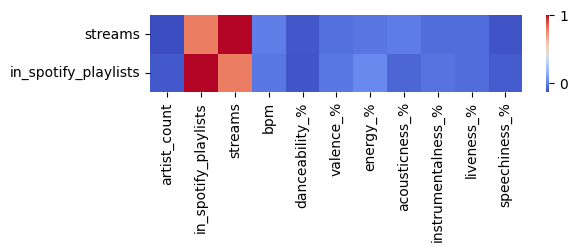

In [73]:
# Now, we'll create a heatmap to get a visual indication whether or not any numeric field on the table strongly correlates to "streams" or "in_spotify_playlists":

plt.figure(figsize = (6,1))
sb.heatmap(songs.corr(numeric_only=True)[["streams", "in_spotify_playlists"]].transpose(), cmap = "coolwarm")

plt.show()

We can see that on the "streams" row and column, every square referring to any field other than "in_spotify_playlists" (which we've already shown has a strong correlation to it) has been colored blue, which suggests little to no correlation.

This means that there is no significant correlation between attributes like danceability, energy etc. and song popularity - **so the answer to our question is no;**

While danceability and energy are attributes that are good for a song to have (since the most popular songs have, in average, high values for them), raising or lowering them (or any other attribute) will *not* help in creating the **most** popular song.

This means artists and producers should not *necessarily* seek certain attributes and elements in their songs to gain popularity, and that there is definitely a place for originality in the leaderboards.

### GRAPH 2 - Distribution graph - how are different song tempos distributed across the charts?

We have noticed earlier that the mean and median in the BPM column are pretty close (around 120BPM - a popular tempo, moderate-fast).

This could suggest an even, normal distribution (bell curve), or could just be a coincidence.

An approximate bell curve would make sense given how we've seen in the previous graph that BPM is allegedly not correlated to song popularity - because it would mean that the relationship between popularity and tempo is not linear.

I'd like to see the distribution of different tempos across the dataset, to know if the ~120BPM tempo really is that prominent and if people like their songs faster or slower.

For that, we can get a histogram chart:

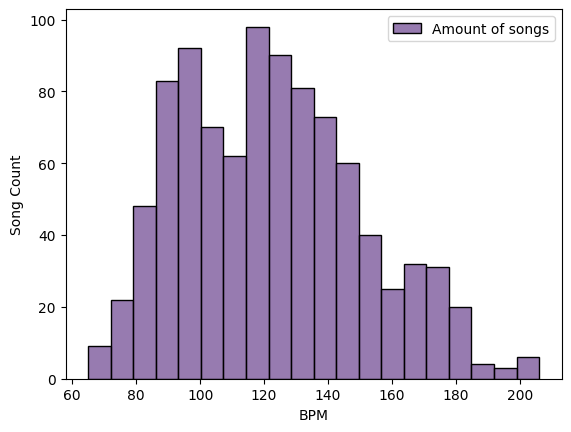

In [74]:
sb.histplot(data = songs, x = "bpm", fill = True, color = "#754F96", bins = 20)
plt.legend(["Amount of songs"])
plt.xlabel("BPM")
plt.ylabel("Song Count")
plt.show()

We can see that there is indeed a peak around 120BPM, meaning this really is the most prominent and common tempo.

The number of songs starts gradually decreasing as tempo goes up;

When tempo goes down, however, it rapidly drops, but surprisingly hits another peak at around 90 BPM.

Generally, this means listeners like *balance* - they prefer moderately fast songs (120-140BPM) and medium-tempo songs (90BPM) over extremely fast or extremely slow songs.

Therefore, musicians seeking public acknowledgement should probably publish songs at a moderate pace rather than very slow-paced or very fast-paced songs.

### GRAPH 3 -  Do artists collaborate more as time passes?

For an artist, collaboration can be a high-risk, high-reward business decision - a successful collaboration with another artist can significantly boost their career, while an unsuccessful one can have them overshadowed and painted in a negative light.

Therefore, it is interesting to check how many artists (on average) have collaborated on the most popular songs in recent years, and how has that figure changed over said years - a rise, for example, would mean more artists should probably consider reaching out to colleagues for new collaborations, and a drop would mean they are probably better off staying on their own.

To more accurately detect recent trends, we'll only sample data from the 11 latest years (2013-2023, including both).

We'll take the average artist count in each year and plot it on a line graph:

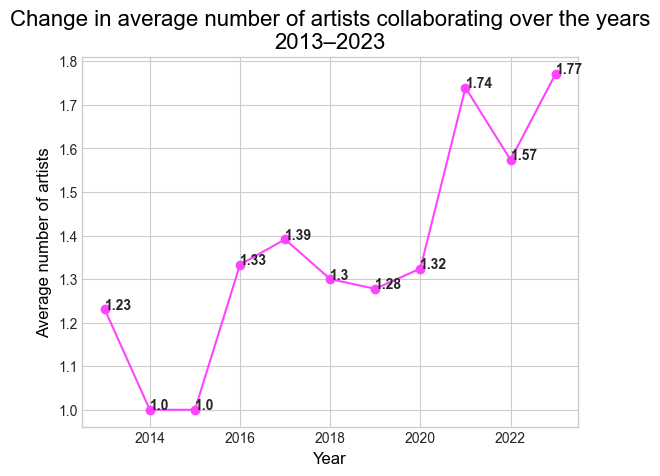

In [75]:
plt.style.use("seaborn-v0_8-whitegrid")
songs_2013_2023 = songs[songs.release_date.dt.year >= 2013] # This variable will only store songs that were released between 2013 and 2023

avg_artist_count = songs_2013_2023.groupby(songs_2013_2023.release_date.dt.year)["artist_count"].mean() # Getting the average artist count for each year in the range


plt.plot(avg_artist_count.index, avg_artist_count, color = "#FF44FF", marker = 'o')
plt.xlabel("Year", fontsize = 12, color = "#000000")
plt.ylabel("Average number of artists", fontsize = 12, color = "#000000")
plt.title("Change in average number of artists collaborating over the years\n2013–2023", color = "#000000", fontsize = 16)
for lineplot_index, lineplot_value in zip(avg_artist_count.index, avg_artist_count):
    plt.annotate(str(round(lineplot_value,2)), xy=(lineplot_index,lineplot_value), fontweight = "bold", ha = "left")

plt.show()

Despite some minor drops, there is a clear trend upwards - which means artists are collaborating more and more, and that those collaborations are getting into the leaderboards more often.

Therefore, artists seeking to increase popularity may want to consider collaborating with other artists.

It is also worth noting that the average artist count is still low and actually never even hits 2 within the graph - which means collaborating with more than one artist would probably be too much, and that releasing a song alone is still OK and a pretty common thing to do.

### GRAPH 4 - Most successful artists
We've already seen who the most successful artists are, but it could be very useful to have a visual indication of that, and know how successful they are in relation to each other - for example, if there is competition for first place, or if there is a single artist currently dominating the #1 spot.

We can view that with a horizontal barplot:

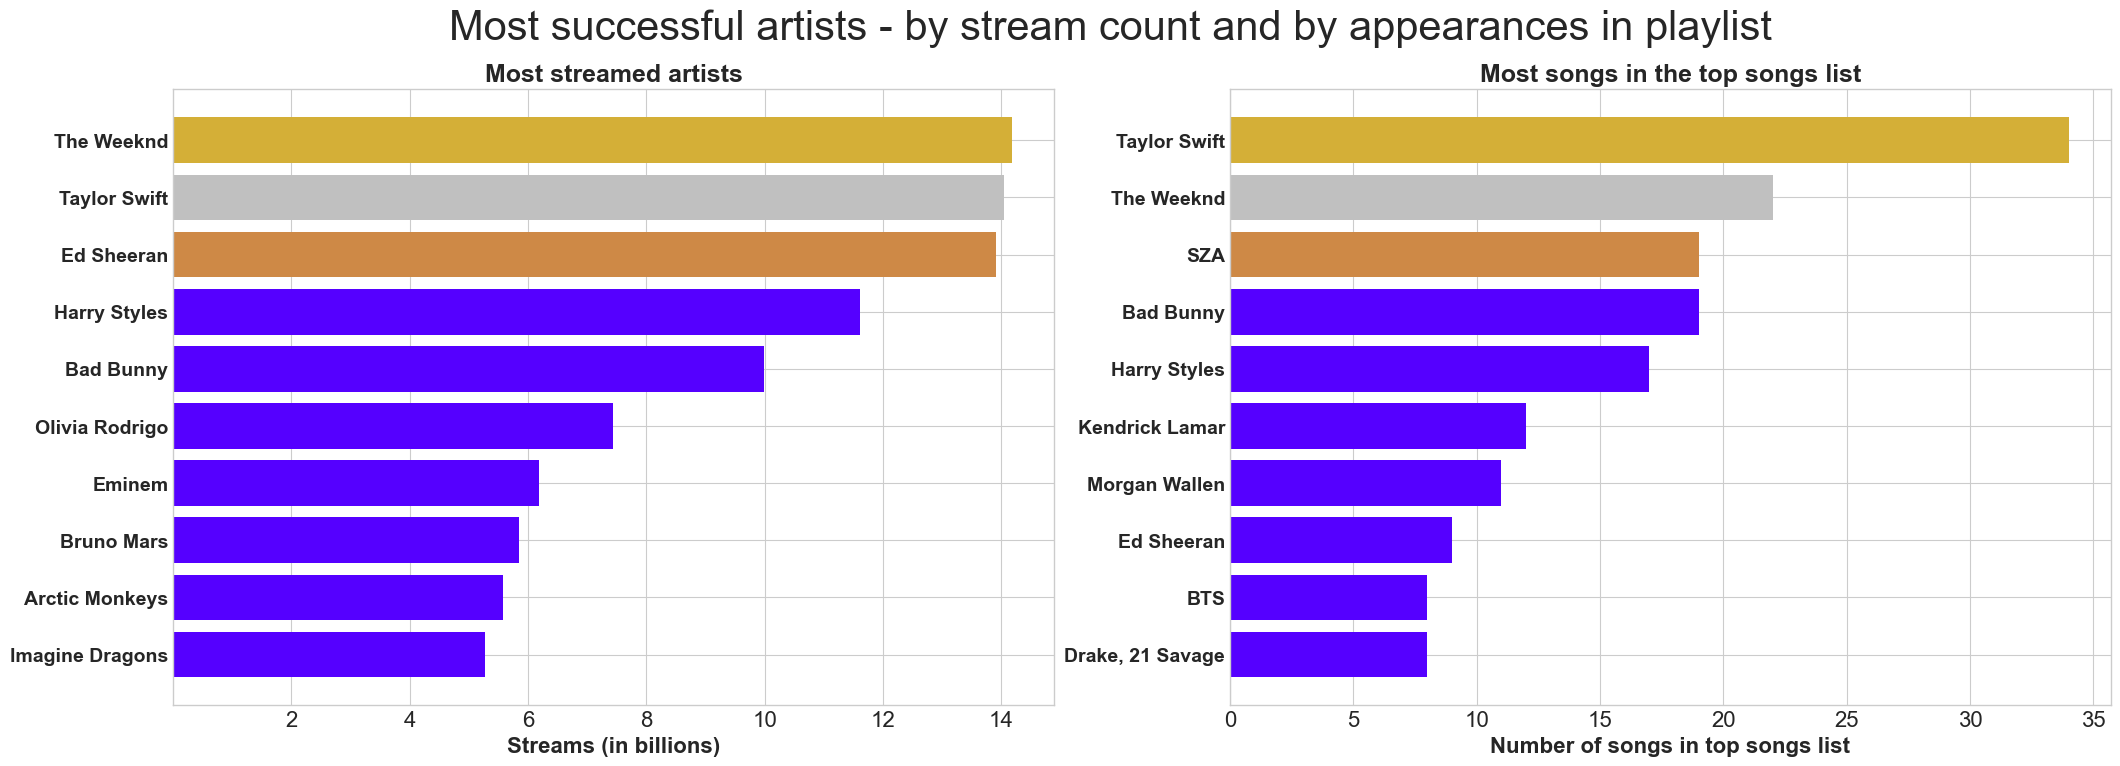

In [76]:
stream_sum = songs.groupby("artist(s)_name")[["streams"]].sum().nlargest(10, "streams").sort_values("streams", ascending = True) # This is so that we can only see the top 10 most-streamed artists
stream_sum_list = list(stream_sum.groupby("artist(s)_name")["streams"].sum()) # This is to allow matplotlib to work with the data, since it doesn't deal well with DataFrame or Series objects
stream_sum_list.sort() # Sorting the list, so that it would match the indexes in the "stream_sum" table that has already been sorted
song_count = songs.groupby("artist(s)_name")[["streams"]].count().nlargest(10, "streams").sort_values("streams", ascending = True) # Same as the sum variable from before
song_count_list = list(song_count.groupby("artist(s)_name")["streams"].sum()) # Same as the sum variable from before
song_count_list.sort() # Same as the sum variable from before


plt.figure(figsize = (25,8))
plt.suptitle("Most successful artists - by stream count and by appearances in playlist", fontsize = 30)

plt.subplot(1,2,1)
plt.barh(stream_sum.index, stream_sum_list, data = stream_sum.index,
        color = ["#5500FF", "#5500FF", "#5500FF", "#5500FF", "#5500FF", "#5500FF", "#5500FF", "#CE8946", "#C0C0C0", "#D4AF37"]) # Colors the top 3 bars gold, silver and bronze, and the rest blue
plt.title("Most streamed artists", fontsize = 18, fontweight = "bold")
plt.xticks([2e9, 4e9, 6e9, 8e9, 1e10, 1.2e10, 1.4e10],
           labels = ["2", "4", "6", "8", "10", "12", "14"], # Converting the values to represent billions of streams
           fontsize = 16)
plt.xlabel("Streams (in billions)", fontsize = 16, fontweight = "bold")
plt.yticks(fontsize = 14, fontweight = "bold")


plt.subplot(1,2,2)
plt.barh(song_count.index, song_count_list,
        color = ["#5500FF", "#5500FF", "#5500FF", "#5500FF", "#5500FF", "#5500FF", "#5500FF", "#CE8946", "#C0C0C0", "#D4AF37"])
plt.title("Most songs in the top songs list", fontsize = 18, fontweight = "bold")
plt.xticks(fontsize = 16)
plt.xlabel("Number of songs in top songs list", fontsize  = 16, fontweight = "bold")
plt.yticks(fontsize = 14, fontweight = "bold")

plt.show()

Things we can understand from the graphs:
- The Weeknd has the most streams (at around 14 billion), but is closely followed by Taylor Swift and Ed Sheeran.
- There is competition for the title of most-streamed artist - Harry Styles and Bad Bunny are not very far away.
- Taylor Swift has the most songs on the list, by a large margin. This means she's a very consistent artist - having a high number of streams and also getting so many songs into the top tracks.
- Except for Taylor Swift, other leading artists are not very far away from each other in terms of amount of songs in the leaderboards, with all of them except for The Weeknd not surpassing 20 different songs in the table.

These charts could mainly use music labels and advertising companies when trying to decide what musicians they should work with.

### GRAPH 5 - Best keys to use for each mode

We have seen earlier what the most popular scales are.

However, a chart describing the most popular scales could be very useful to a producer/musician trying to produce the next big hit;

Furthermore, in case the song already has a certain "feel" (happy/sad), it could be useful to divide the chart to show major scales and minor scales separately, so that the producer/musician can pick a fitting scale.

<Figure size 2500x800 with 0 Axes>

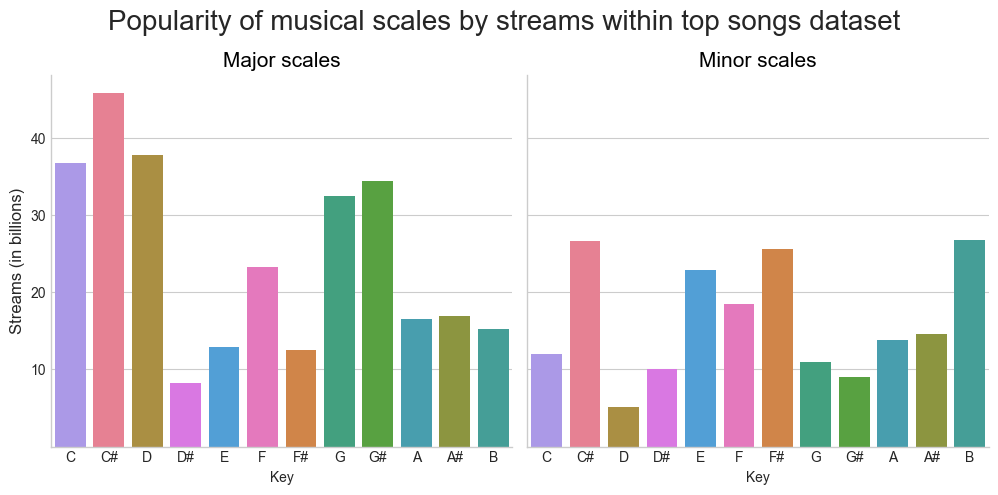

In [77]:
plt.figure(figsize = (25, 8))

scales_graph = sb.catplot(data = songs, x = "key", y = "streams", col = "mode", kind = "bar", estimator = "sum", errorbar=None, hue = "key",
           order = ["C", "C#","D","D#","E","F","F#","G","G#","A","A#","B"]) # The actual order of musical notes, from C and up
scales_graph.set_titles(col_template="{col_name} scales", row_template="{row_name}", color = "#000000", size = 15)
scales_graph.set_ylabels("Streams (in billions)", fontsize = 12)
scales_graph.set_xlabels("Key")
plt.yticks([1e10, 2e10, 3e10, 4e10], labels = [10, 20, 30, 40]) # Converting the y-tick values to billions of streams
scales_graph.fig.subplots_adjust(top=0.85)
scales_graph.fig.suptitle("Popularity of musical scales by streams within top songs dataset", size = 20)

plt.show()

We can see the following things:
- For major scales, the best keys to use are C, C# and D; G and G# are also good.
- For minor scales, B, C# and F# are the best.
- The mentioned major scales are significantly more popular than the minor scales - the 5th-most popular major scale still has more streams than the most popular minor scale.

Some more conclusions we can derive:
- The key of D# is to be avoided, as it doesn't do well in neither mode.
- For songs that switch from minor to major (or vice versa), C# is a great candidate for a key, since it does well in both modes.

## PART 3 - Conclusion

We have now analyzed and visualized the data about the most popular songs on the Spotify platform (as of 2023).

Based on our analysis, we have come to the following conclusions:

- The most successful artists on Spotify are **Taylor Swift** and **The Weeknd**.
- Songs in **major scales** (especially the C, C#, D, G and G# keys) tend to gain **more popularity** than songs in minor scales.
- **Collaborations between artists are becoming more and more popular recently**, and artists should consider them (although still in low numbers, like 2 artists per song).
- Most songs on the leaderboard have a **moderate** tempo, with ~120BPM and ~90BPM being the most popular.
- The best time of the year to release a song is **fall** (September-November), and the worst time of the year to release a song is **winter** (December-February).
- The average song on the top tracks list has high values of **danceability and energy** (over 60%), so they are possibly traits that are important for producing a popular song that would get *in the leaderboards*. **However,** there is **no direct correlation** between streams and any of the song attribute columns, so artists looking to produce *the #1 song* shouldn't necessarily *maximize* those attributes, and can stay original.

These conclusions can be very useful to musicians and producers looking to produce the most popular songs and release them at the right time, and can also be useful to business people looking to collaborate with the most successful artists the industry has to offer.